# Read data from xlsx

In [8]:
from __future__ import division, generators, absolute_import, print_function

In [9]:
from openpyxl import load_workbook
data_dir = '../data/'
wb = load_workbook(data_dir + 'Bishayee Colony Counts 10.27.97-3.8.01.xlsx') 
print(wb.get_sheet_names())
ws = wb.get_sheet_by_name('Sheet1')
print(ws['A1'].value)
rawData = []
for i in range(4, 1366):
    tmp = [ws['D' + str(i)].value, ws['E' + str(i)].value, ws['F' + str(i)].value]
    if isinstance(tmp[0], (int, int)) & isinstance(tmp[1], (int, int)) & isinstance(tmp[2], (int, int)):
        rawData.append(tmp)
print(len(rawData))
print(rawData[18])


['Sheet1']
Bishayee Colony Counts 128 experiments
1361
[170, 171, 176]


### Figure 1:

1343


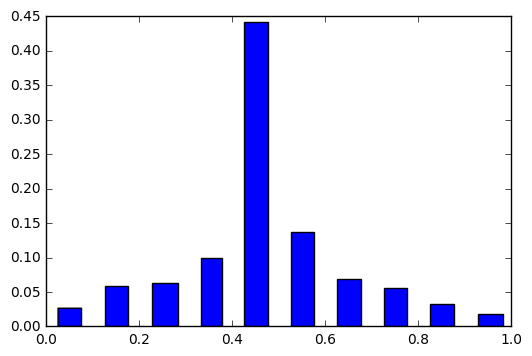

[ 0.     0.101  0.201  0.31   0.401  0.501  0.601  0.701  0.801  0.901
  1.01 ]
[ 0.02645114  0.05804555  0.06245408  0.09992652  0.44158707  0.13739897
  0.06833211  0.05510654  0.03232917  0.01836885]


In [127]:
from statistics import mean
import matplotlib.pyplot as plt
import numpy as np

sortData = rawData
for i in range(len(sortData)):
    sortData[i].sort()

cleanData = [x for x in sortData if x[0] < x[2] - 1]

print(len(cleanData))
tmp = [(x[1] - x[0])*1.0/max(x[2] - x[0],1) for x in sortData]
counts, bins, ignored = plt.hist(tmp, [0, .101, .201, .301, .401, .501, .601, .701, .801, .901, 1.01], rwidth=0.5, weights=np.zeros_like(tmp) + 1. / len(tmp))
plt.show()
print(bins)
print(counts)

** Unresolved issues: **
* notice: must delete those with gap smaller than 2.
* the figure looks a little bit different from (a), see 0.3 and 0.9
* (b)

### Table 1:

In [37]:
from scipy.stats import poisson
import numpy as np

In [38]:
def calc_P(i):
    P = 0
    # N is the truncation number of Poisson
    N = int(poisson.ppf(1 - 1e-9, i))
    for j in range(2, N):
        for k in range(j, N):
            P += 6 * poisson.pmf(k - j, i) * poisson.pmf(k, i) * poisson.pmf(k - int(j/2), i)
            # just to follow the usage in Yu's code, I add int in poisson.pmf(k - int(j/2), i),
            # do we really need to round the number?
            if j % 2 == 1:
                P += 6 * poisson.pmf(k - j, i) * poisson.pmf(k, i) * poisson.pmf(k - int(j/2) - 1, i)
    return P

In [47]:
lamMax  = 26
P = [calc_P(i) for i in range(1, lamMax)]

print(P)

[0.26702986911340515, 0.38697538791651365, 0.40296908640372125, 0.39668662878008421, 0.3848230099341941, 0.37189059517633744, 0.35930388654896872, 0.34750551865000728, 0.33659691303691947, 0.32655474404486895, 0.31731236471387564, 0.30879197597554453, 0.30091738694121262, 0.29361874140237687, 0.2868338449147752, 0.28050807154138352, 0.27459371956229822, 0.26904920160819301, 0.2638382359158028, 0.25892910599811175, 0.2542940098871847, 0.24990850021598257, 0.2457510075333062, 0.24180243649550481, 0.23804582464974514]


In [78]:
# Write mid probability to txt
P_to_txt = [[lam, P[lam-1]] for lam in range(1, lamMax)]
output_dir = "../outputs/"
thefile = open(output_dir + "MidProb.txt", 'w')
for item in P_to_txt:
    thefile.write('\t'.join(map(repr, item)) + '\n')

** Reflection: **

* Did not include the prob that small = medium = big and no justification.

* Poisson distribution with same mean is not very convincing. Can be more non-parametric (bootstrap from other people's data).

### Hypothesis testing I:

In [15]:
from scipy.stats import binom
print(1 - binom.cdf(690 - 1, 1343, 0.42))
print(1 - binom.cdf(109 - 1,  572, 0.13))

2.85338419559e-12
2.82052399667e-05


** Reflection: **
    
* It is not reasonable to consider binomial: some experiments might be correlated. 

* It will be of interest to check the p-value of other people. What if it is significant as well?